In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-payment-methods/brazilian_payment_methods.csv


In [2]:
df = pd.read_csv('/kaggle/input/brazilian-payment-methods/brazilian_payment_methods.csv')

In [3]:
df.head()

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC
0,202405,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00
1,202404,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00
2,202403,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00
3,202402,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21
4,202401,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58


In [4]:
df.tail()

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC
96,201605,0.0,0.0,38397.79,1284857.76,658.08,1242.92,49391.10,85525.27,210245.33,243361.74,15222.38,12172.78
97,201604,0.0,0.0,36144.63,1284108.75,586.71,1029.40,45938.34,79444.79,195789.71,226725.92,14376.42,11632.65
98,201603,0.0,0.0,37762.98,1387738.67,666.89,1250.64,50443.05,85203.32,207938.76,239690.04,15322.97,12303.86
99,201602,0.0,0.0,33986.29,1184928.57,576.42,1079.27,46957.82,79927.23,197575.71,225107.82,14455.60,11778.74
100,201601,0.0,0.0,30728.99,1211165.94,499.31,939.45,45294.31,82800.04,189912.22,222612.29,15709.98,12016.73


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YearMonth                       101 non-null    int64  
 1   quantityPix                     101 non-null    float64
 2   valuePix                        101 non-null    float64
 3   quantityTED                     101 non-null    float64
 4   valueTED                        101 non-null    float64
 5   quantityTEC                     101 non-null    float64
 6   valueTEC                        101 non-null    float64
 7   quantityBankCheck               101 non-null    float64
 8   valueBankCheck                  101 non-null    float64
 9   quantityBrazilianBoletoPayment  101 non-null    float64
 10  valueBrazilianBoletoPayment     101 non-null    float64
 11  quantityDOC                     101 non-null    float64
 12  valueDOC                        101 

In [6]:
df.isnull().sum()

YearMonth                         0
quantityPix                       0
valuePix                          0
quantityTED                       0
valueTED                          0
quantityTEC                       0
valueTEC                          0
quantityBankCheck                 0
valueBankCheck                    0
quantityBrazilianBoletoPayment    0
valueBrazilianBoletoPayment       0
quantityDOC                       0
valueDOC                          0
dtype: int64

In [7]:
df.columns

Index(['YearMonth', 'quantityPix', 'valuePix', 'quantityTED', 'valueTED',
       'quantityTEC', 'valueTEC', 'quantityBankCheck', 'valueBankCheck',
       'quantityBrazilianBoletoPayment', 'valueBrazilianBoletoPayment',
       'quantityDOC', 'valueDOC'],
      dtype='object')

In [9]:
df.shape

(101, 13)

In [10]:
df.describe()

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC
count,101.000000,1.010000e+02,1.010000e+02,101.000000,1.010000e+02,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,201978.603960,9.822789e+05,4.269130e+05,80893.674455,2.341740e+06,728.673366,1494.043069,26852.919802,60465.365050,281402.188218,344113.619901,12522.199208,9539.631485
std,244.716533,1.506205e+06,6.221059e+05,35956.902905,8.655333e+05,229.288284,449.479457,11964.408858,13305.203291,64675.376751,99628.427137,7118.742203,4964.024293
min,201601.000000,0.000000e+00,0.000000e+00,30728.990000,1.101077e+06,0.000000,0.000000,10122.460000,36644.550000,174654.920000,196068.110000,0.000000,0.000000
25%,201802.000000,0.000000e+00,0.000000e+00,55697.340000,1.494125e+06,657.190000,1388.890000,16195.580000,49988.270000,216230.670000,253446.630000,5253.950000,4725.760000
50%,202003.000000,0.000000e+00,0.000000e+00,74398.370000,2.217642e+06,716.000000,1521.420000,24455.110000,57856.850000,272526.140000,307807.550000,15181.120000,11483.080000
75%,202204.000000,1.664792e+06,7.870177e+05,96520.800000,3.159715e+06,801.690000,1649.090000,36378.220000,72834.730000,348653.580000,443844.710000,17385.410000,13355.080000
max,202405.000000,5.228827e+06,2.137206e+06,193914.690000,3.810325e+06,1305.510000,2757.910000,50443.050000,85525.270000,380679.530000,524619.690000,29095.160000,20513.660000


In [12]:
df.corr()

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC
YearMonth,1.000000,0.828777,0.848962,0.401870,0.941953,-0.376302,-0.231095,-0.977214,-0.919694,0.917959,0.938460,-0.756319,-0.816414
quantityPix,0.828777,1.000000,0.997140,-0.041688,0.780398,-0.488812,-0.355927,-0.737170,-0.707569,0.692983,0.863123,-0.863422,-0.879358
valuePix,0.848962,0.997140,1.000000,-0.019956,0.813258,-0.488972,-0.353311,-0.761714,-0.723022,0.729863,0.890160,-0.884707,-0.899026
quantityTED,0.401870,-0.041688,-0.019956,1.000000,0.433247,0.101670,0.137105,-0.506904,-0.505413,0.569966,0.314525,0.152828,0.063672
valueTED,0.941953,0.780398,0.813258,0.433247,1.000000,-0.269969,-0.119566,-0.920693,-0.826339,0.968655,0.973301,-0.756576,-0.789608
quantityTEC,-0.376302,-0.488812,-0.488972,0.101670,-0.269969,1.000000,0.971819,0.303341,0.310354,-0.301236,-0.360238,0.417000,0.430536
valueTEC,-0.231095,-0.355927,-0.353311,0.137105,-0.119566,0.971819,1.000000,0.160267,0.184171,-0.162606,-0.208941,0.297083,0.310455
quantityBankCheck,-0.977214,-0.737170,-0.761714,-0.506904,-0.920693,0.303341,0.160267,1.000000,0.958550,-0.912288,-0.889692,0.672791,0.740497
valueBankCheck,-0.919694,-0.707569,-0.723022,-0.505413,-0.826339,0.310354,0.184171,0.958550,1.000000,-0.821551,-0.790844,0.613188,0.688808
quantityBrazilianBoletoPayment,0.917959,0.692983,0.729863,0.569966,0.968655,-0.301236,-0.162606,-0.912288,-0.821551,1.000000,0.946717,-0.668834,-0.713681


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

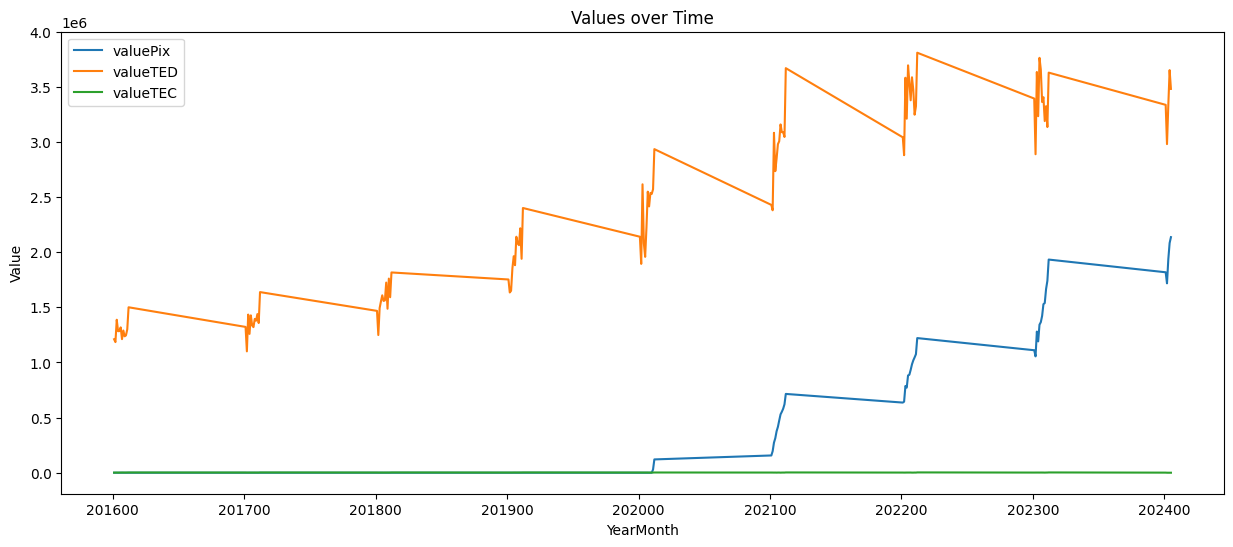

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(df['YearMonth'], df['valuePix'], label='valuePix')
plt.plot(df['YearMonth'], df['valueTED'], label='valueTED')
plt.plot(df['YearMonth'], df['valueTEC'], label='valueTEC')
plt.xlabel('YearMonth')
plt.ylabel('Value')
plt.title('Values over Time')
plt.legend()
plt.show()

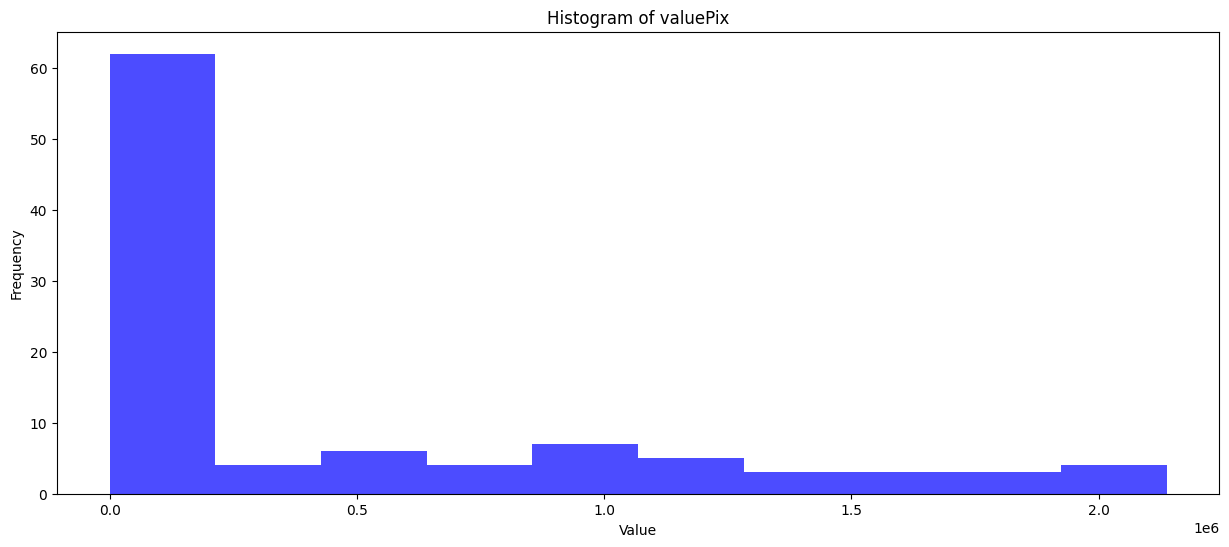

In [21]:
plt.figure(figsize=(15, 6))
plt.hist(df['valuePix'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of valuePix')
plt.show()

/tmp/ipykernel_33/1410609967.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['valueTED'], hist=True, kde=True, bins=10, color='green')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


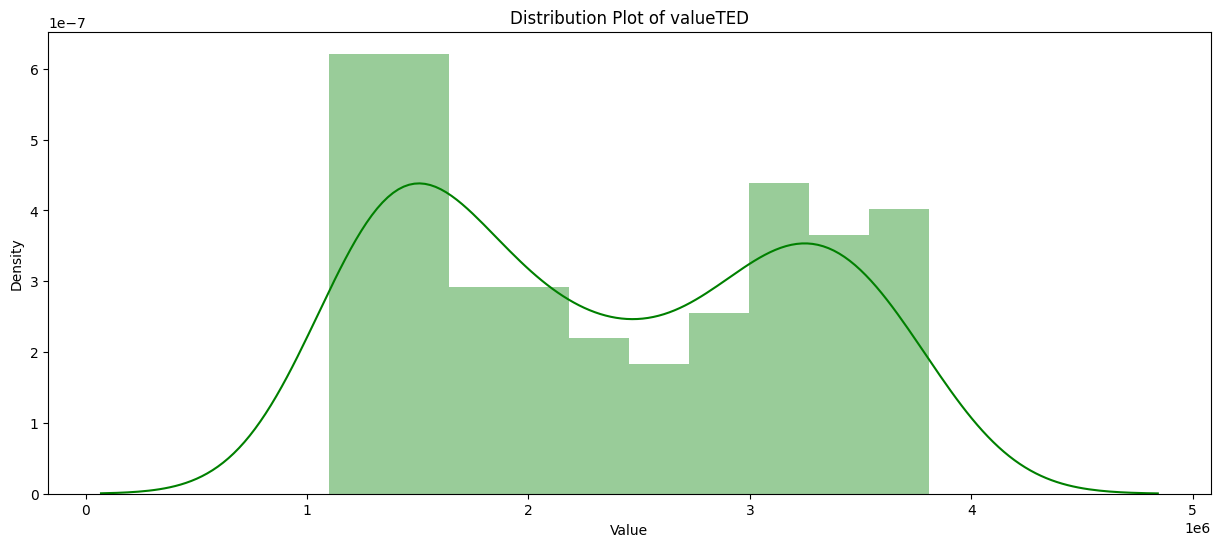

In [22]:
plt.figure(figsize=(15, 6))
sns.distplot(df['valueTED'], hist=True, kde=True, bins=10, color='green')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of valueTED')
plt.show()

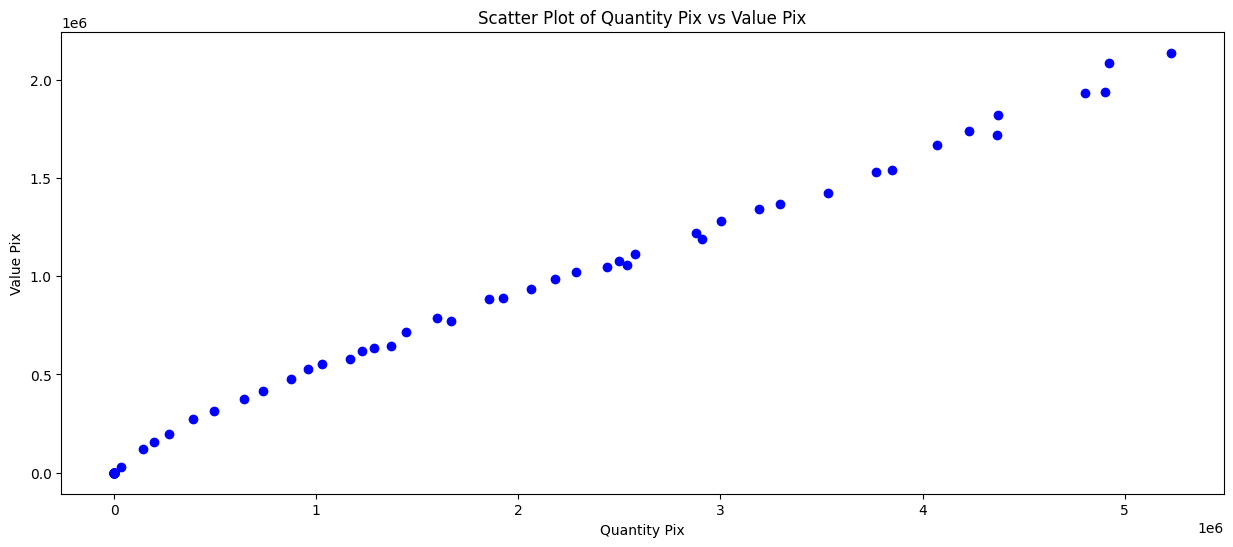

In [23]:
plt.figure(figsize=(15, 6))
plt.scatter(df['quantityPix'], df['valuePix'], color='blue')
plt.xlabel('Quantity Pix')
plt.ylabel('Value Pix')
plt.title('Scatter Plot of Quantity Pix vs Value Pix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 3000x1500 with 0 Axes>

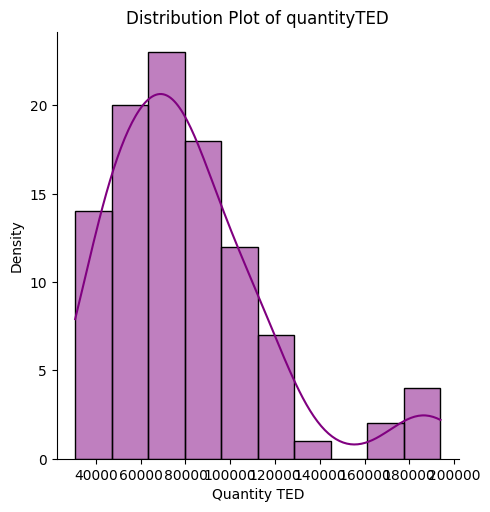

In [27]:
plt.figure(figsize=(30, 15))
sns.displot(df['quantityTED'], kde=True, color='purple')
plt.xlabel('Quantity TED')
plt.ylabel('Density')
plt.title('Distribution Plot of quantityTED')
plt.show()

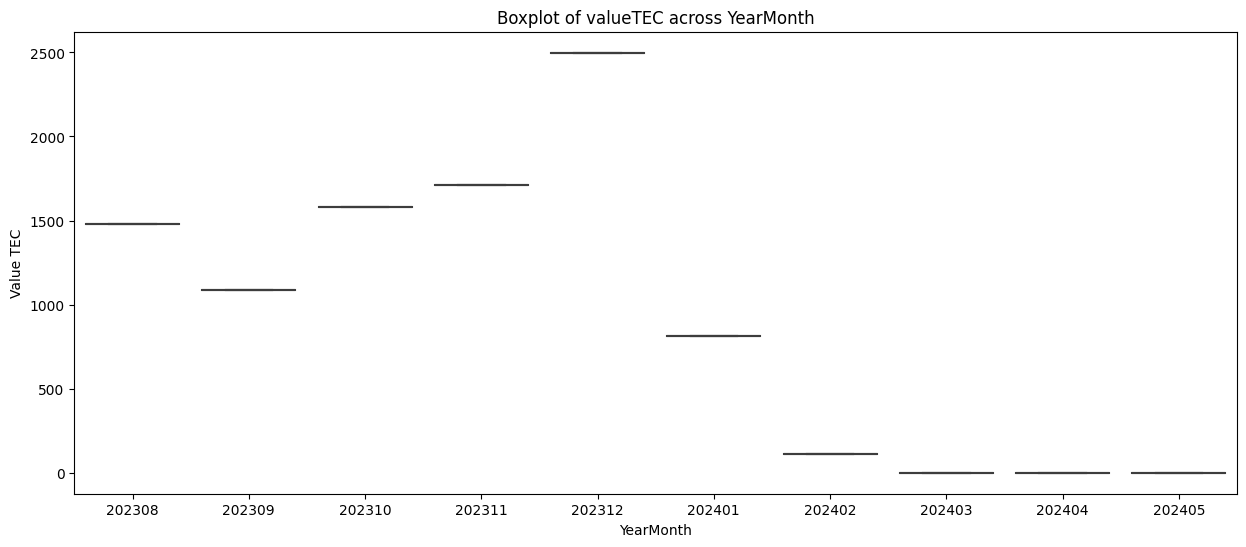

In [36]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['YearMonth'].head(10), y='valueTEC', data=df)
plt.xlabel('YearMonth')
plt.ylabel('Value TEC')
plt.title('Boxplot of valueTEC across YearMonth')
plt.show()

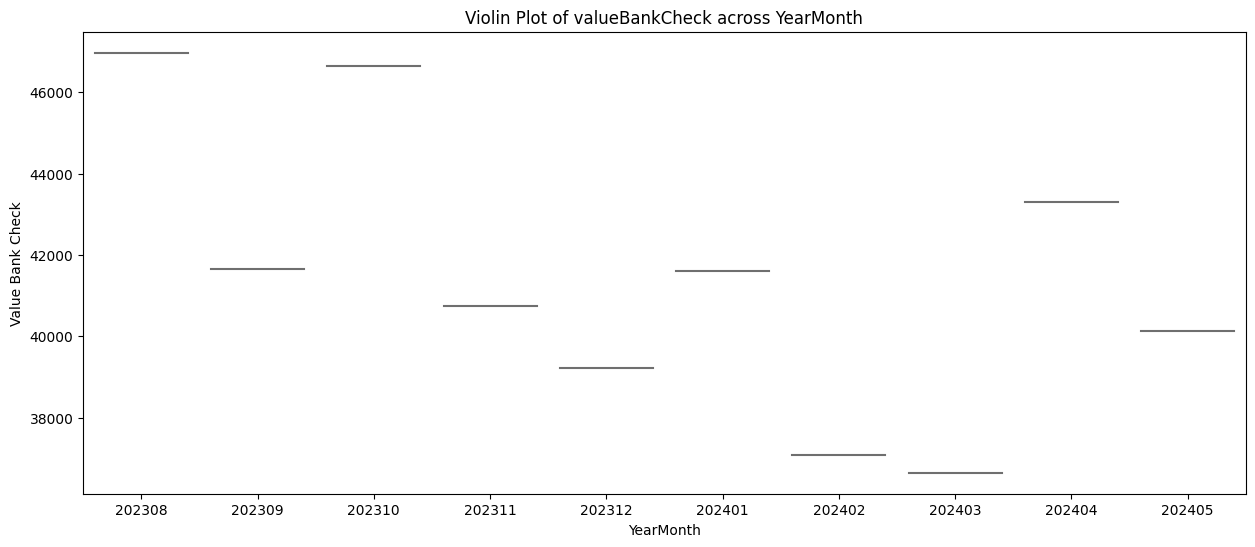

In [37]:
plt.figure(figsize=(15, 6))
sns.violinplot(x=df['YearMonth'].head(10), y='valueBankCheck', data=df, palette='pastel')
plt.xlabel('YearMonth')
plt.ylabel('Value Bank Check')
plt.title('Violin Plot of valueBankCheck across YearMonth')
plt.show()

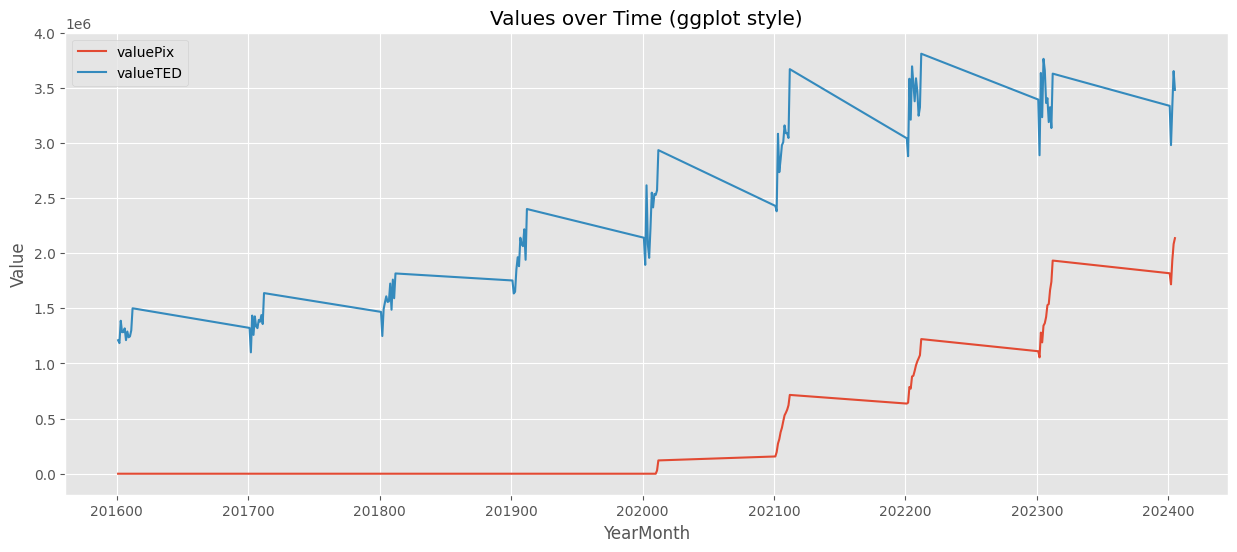

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
plt.plot(df['YearMonth'], df['valuePix'], label='valuePix')
plt.plot(df['YearMonth'], df['valueTED'], label='valueTED')
plt.xlabel('YearMonth')
plt.ylabel('Value')
plt.title('Values over Time (ggplot style)')
plt.legend()
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
X = df.drop(columns=['YearMonth'])  # Features
y = df['valuePix']  # Target variable (example using 'valuePix' as target)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Creating and training the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluating the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")
print()

Linear Regression:
Mean Squared Error: 8.479940884412728e-18
R-squared: 1.0



In [43]:
model_ridge = Ridge(alpha=1.0)  # You can tune the regularization parameter 'alpha'
model_ridge.fit(X_train, y_train)

# Predicting on the test set
y_pred_ridge = model_ridge.predict(X_test)

# Evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")
print()

Ridge Regression:
Mean Squared Error: 4.125390462553075e-13
R-squared: 1.0



In [44]:
# Creating and training the Lasso Regression model
model_lasso = Lasso(alpha=0.1) 
model_lasso.fit(X_train, y_train)

# Predicting on the test set
y_pred_lasso = model_lasso.predict(X_test)

# Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")
print()

Lasso Regression:
Mean Squared Error: 41700154.4169851
R-squared: 0.9999064727652275



In [45]:
# Creating a pipeline for SVR with scaling
model_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))  
model_svr.fit(X_train, y_train)

# Predicting on the test set
y_pred_svr = model_svr.predict(X_test)

# Evaluating the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression (SVR):")
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared: {r2_svr}")
print()

Support Vector Regression (SVR):
Mean Squared Error: 703324200867.055
R-squared: -0.5774514165557834



In [46]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  
model_rf.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")
print()

Random Forest Regression:
Mean Squared Error: 2325453013.0763516
R-squared: 0.9947843552872361



In [47]:
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42) 
model_gb.fit(X_train, y_train)

# Predicting on the test set
y_pred_gb = model_gb.predict(X_test)

# Evaluating the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared: {r2_gb}")
print()

Gradient Boosting Regression:
Mean Squared Error: 1499006606.4085834
R-squared: 0.9966379514713263



In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Creating a Sequential model
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compiling the model
model_dl.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model_dl.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the model on the test set
mse_dl = model_dl.evaluate(X_test, y_test)
print(f"Deep Learning MSE: {mse_dl}")

2024-06-28 11:33:07.105582: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 11:33:07.105751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 11:33:07.313337: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 306427985920.0000 - val_loss: 312527388672.0000
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 291645915136.0000 - val_loss: 218584088576.0000
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 187905425408.0000 - val_loss: 157477126144.0000
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 198767329280.0000 - val_loss: 110237589504.0000
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 117116051456.0000 - val_loss: 73715785728.0000
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 62785777664.0000 - val_loss: 49300029440.0000
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 72131141632.0000 - val_loss: 35452846080.0000
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 72473853952.0000 - val_loss: 29027463168.0000
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 64182599680.0000 - val_loss: 26698717184.0000
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 57579675648.0000

In [49]:
from sklearn.metrics import r2_score

# Evaluate Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R-squared: {r2_lr}")

# Evaluate Deep Learning model
y_pred_dl = model_dl.predict(X_test)
r2_dl = r2_score(y_test, y_pred_dl)
print(f"Deep Learning R-squared: {r2_dl}")

Linear Regression R-squared: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Deep Learning R-squared: 0.9944516261329911
